**063_Khiena Salsabiila Susanty_SI 2021 A**

In [ ]:
import pandas as pd
import numpy as np
colnames =['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
dataku=pd.read_csv('wine.data',names=colnames)

In [ ]:
dataku.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate,cross_val_score
model=KNeighborsClassifier(n_neighbors=45, weights='distance')
X=dataku.drop('Class',axis=1)
y=dataku['Class']
cv_score1=cross_validate(model,X,y,cv=5, return_train_score=True)
cv_score2=cross_val_score(model,X,y,cv=10)

In [ ]:
print (cv_score1['train_score'].mean(), cv_score1['test_score'].mean())

1.0 0.7142857142857143


In [ ]:
print(cv_score2.mean()) #test_score

0.7258169934640523


In [ ]:
def knn_predict(k) :
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_validate(model,X,y,cv=10, return_train_score=True)
    train_score = score['train_score'].mean()
    test_score = score['test_score'].mean()
    return train_score, test_score

In [ ]:
#Tuning Hyperparameter KNN manual
train_scores=[]
test_scores=[]
for k in range (2,100):
    train_score, test_score=knn_predict(k)
    train_scores.append(train_score)
    test_scores.append(test_score)

<function matplotlib.pyplot.show(close=None, block=None)>

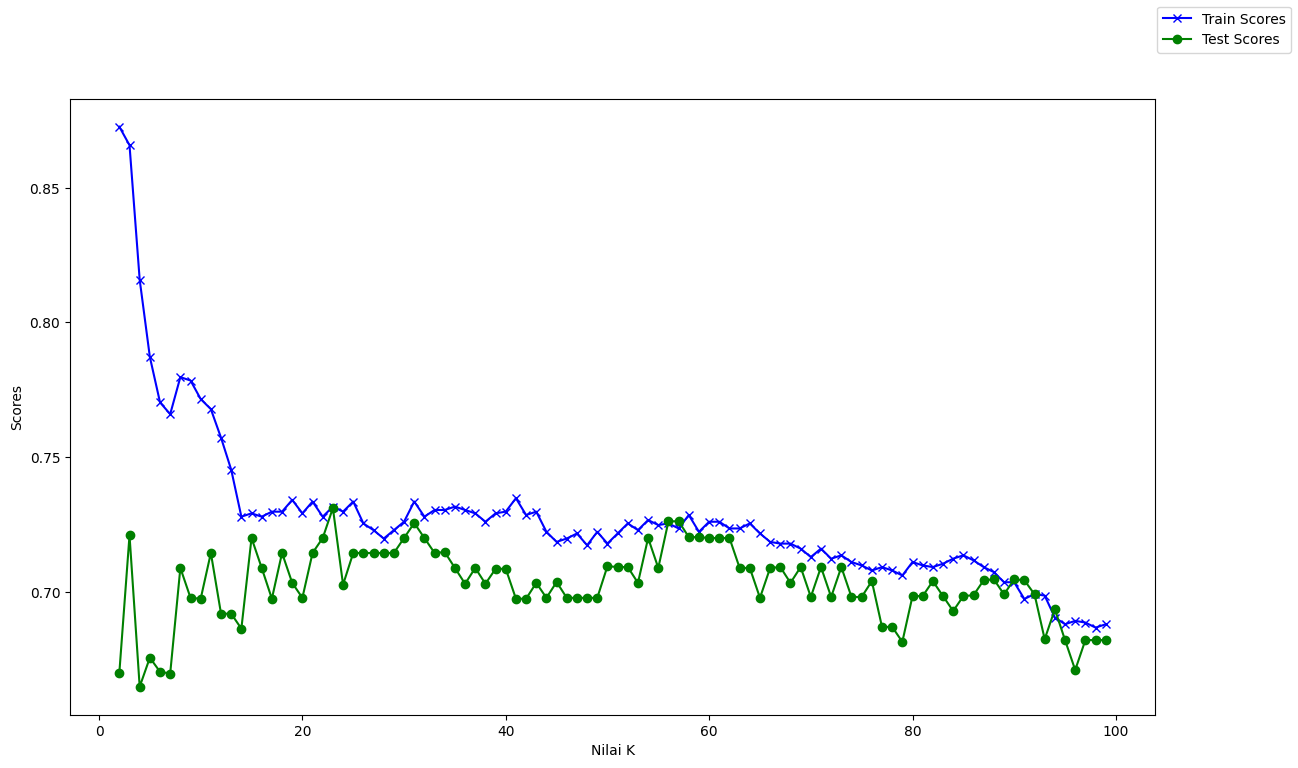

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(14,8))
ax.plot(range(2,100),train_scores, marker='x', color='b', label='Train Scores')
ax.plot(range(2,100),test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Scores')
fig.legend()
plt.show


In [ ]:
#Tuning Hyperparameter KNN otomatis dengan GridSearchCV
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
gscv=GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X,y)
print(gscv.best_params_,gscv.best_score_)

{'n_neighbors': 37, 'weights': 'distance'} 0.7255555555555555


In [ ]:
#Tuning Hyperparameter KNN otomatis dengan RandomGridSearchCV , default iter =10
from sklearn.model_selection import RandomizedSearchCV
model = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
rscv=RandomizedSearchCV(model, param_grid,n_iter=15, scoring='accuracy', cv=5)
rscv.fit(X,y)
print(rscv.best_params_, rscv.best_score_)

{'weights': 'distance', 'n_neighbors': 39} 0.7198412698412698


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.67      0.46      0.55        13
           2       0.40      0.67      0.50         9

    accuracy                           0.67        36
   macro avg       0.69      0.66      0.66        36
weighted avg       0.73      0.67      0.68        36

